**SEGUIMIENTO 2**

## 1. Contexto
## Consultar historia, aplicaciones y principales industrias de prótesis mioeléctricas (10%)


##### HISTORIA:
Las prótesis mioeléctricas son dispositivos electrónicos avanzados diseñados para reemplazar extremidades perdidas, como brazos o manos. Funcionan mediante la detección de señales eléctricas generadas por los músculos residuales del paciente, permitiendo controlar el movimiento y la funcionalidad de la prótesis de manera más natural y precisa. Su historia abarca diversas etapas de desarrollo y avances tecnológicos que han sido importantes en la humanidad, estas etapas empiezan desde el inicio de los desarrollos de los primeros dispositivos, los primeros intentos de utilizar señales musculares para controlar prótesis datan de la década de 1940-1950, en la que se destaca Reinhold Reiter, un ingeniero austríaco, quien en 1948 desarrolló una prótesis que utilizaba un electrodo colocado en contacto con el músculo residual del paciente para captar señales eléctricas y controlar el movimiento de la prótesis, el sistema era controlado por un amplificador de tubo de vacío y no era portátil. Este sistema era pesado, grande y no funcionaba con batería; la idea era usarlo como una prótesis especial en una estación de trabajo. En las décadas siguientes se produjeron avances significativos en la tecnología electrónica, lo que permitió el desarrollo de prótesis más sofisticadas. En 1962, el Dr. A. M. Childress diseñó la primera prótesis controlada por señales musculares, utilizando electrodos de superficie para captar señales mioeléctricas y controlar el movimiento de la mano protésica. 

En la década de 1970, las prótesis mioeléctricas comenzaron a ganar popularidad, especialmente en el ámbito militar para veteranos de guerra, gracias a mejoras tecnológicas que las hicieron más funcionales y cómodas de usar. Esta tendencia continuó en la década de 1980 con la introducción de microprocesadores en las prótesis, lo que mejoró significativamente la precisión y el control de los movimientos. Además, se emplearon materiales más livianos y duraderos, lo que aumentó la comodidad y la eficacia de las prótesis. Esto llevó a que en la década de 1980, las prótesis mioeléctricas fueran utilizadas en centros de rehabilitación en todo el mundo, y en la actualidad, se han convertido en una opción común para personas amputadas. 


#### APLICACIONES E INDUSTRIA:
Los avances contemporáneos en prótesis mioeléctricas han llevado a desarrollos significativos en varias áreas clave. Esto ha permitido una infinidad de aplicaciones que contribuyen al mejoramiento de la calidad de vida de las personas con limitaciones de movilidad o que han perdido alguna extremidad, estas aplicaciones de las prótesis mioeléctricas son principalmente usadas en campos como:

-Medicina Rehabilitativa: Las prótesis mioeléctricas son ampliamente utilizadas en entornos de rehabilitación para personas con amputaciones de extremidades superiores. Estas prótesis ayudan a restaurar la funcionalidad y la autonomía en actividades diarias como agarrar objetos, manipular herramientas y realizar tareas cotidianas. 

-Práctica Deportiva Adaptativa: En el ámbito deportivo, las prótesis mioeléctricas especializadas permiten a atletas con amputaciones participar en diversas disciplinas, como la natación, el atletismo y el ciclismo. 


Todo esto lo ha permitido, los importantes avances que ha tenido toda la tecnología relacionada a la captación de las bioseñales, avances también, como la integración de interfaces cerebro-computadora ha permitido un control más directo y preciso de las prótesis, como ejemplificado por el Neuro-Controlled Bionic Arm de BrainRobotics. Los sensores avanzados y la retroalimentación háptica, como se ve en la mano biónica i-limb de Össur, mejoran la experiencia del usuario al proporcionar información táctil. La inteligencia artificial y el aprendizaje automático han optimizado el funcionamiento de las prótesis, adaptándose a las necesidades individuales del usuario, como en la prótesis mioeléctricas bebionic de Ottobock. Además, los avances en materiales y diseño han aumentado la comodidad y la eficiencia de las prótesis, como se evidencia en la mano biónica Hero Arm de Open Bionics, y la integración de tecnologías de realidad virtual y aumentada, como en la plataforma de entrenamiento Virtual Reality Rehabilitation System (VRRS), ha facilitado el proceso de entrenamiento y adaptación.


La industria, conformada por algunas de las empresas anteriormente nombradas, así como también otras empresas que han sido especializadas en dispositivos médicos, como Ottobock, Össur y Touch Bionics, son líderes en el desarrollo y fabricación de prótesis mioeléctricas, estas ultimas especializándose más en la investigación, diseño y comercialización de prótesis avanzadas para su uso en entornos clínicos y de rehabilitación. Así como también, sorpresivamente empresas de tecnología y electrónica, como Intel y Apple, han incursionado en el campo de las prótesis mioeléctricas al desarrollar componentes y sistemas electrónicos utilizados en estas prótesis. La integración de sensores, microprocesadores y software especializado es fundamental para el funcionamiento óptimo de las prótesis, todas estas empresas son las que conforman la importante industria de las prótesis mioeléctricas. 


## 2. Adquisición
## Proponer estrategias que permitan mejorar la fijación  de los sensores 10%. Proponer cual sería la mejor ubicación del electrodo para capturar el movimiento de flexión-extensión de codo 10%


La electromiografía es una técnica médica experimental que registra la actividad eléctrica de los músculos y los nervios que los controlan por medio de las variaciones fisiológicas en el estado de las membranas de las fibras musculares. Existen diferentes métodos para la adquisición de estas señales usando diferentes tipos de sensores, para los efectos prácticos de estas adquisiciones experimentales, se opta por usar el EMG de superficie para una evaluación no invasiva de los músculos. Para la adquisición de las señales deseadas por este método, se debe tener en cuenta ciertos parámetros, como la configuración de los sensores, que en este caso serán electrodos, para estos el material, forma y tamaño, así como también la orientación y ubicación de estos en el músculo objeto de estudio.  


Por información teórica, se conoce que los electrodos de gel húmedo ofrecen los mejores resultados en la impedancia de la piel, este gel es utilizado para reducir esta característica, debido a que una baja impedancia ofrece lecturas más estables y de bajo nivel de ruido en el electrodo. 


##### Estrategias para mejorar la fijación de los sensores: 

Los sensores a utilizar para los efectos prácticos y experimentales de estas adquisiciones son los electrodos de superficie, de tamaño pequeños, esto según la teoría para incrementar la selectividad de las mediciones y evitar perturbaciones eléctricas en las mediciones como posibles diafonías, esto también ubicando los tres electrodos usados para la medición, el de Registro, el de Referencia y el de Tierra, a longitudes de más de 2 cm, de punto central a punto central. 


Al momento de ubicar los electrodos, lo mejor es limpiar la zona con alcohol, y de ser el caso, desbastar las superficies callosas, esto se hace para eliminar cuerpos externos que puedan influir en la conducción y posterior adquisición de las señales entre la superficie de la piel y el electrodo, cuerpos como suciedad, mugre, sudor, fluidos, grasas o aceites que terminarían afectando la conducción natural y limpia de la señal eléctrica producida por el músculo, esto también ayuda a reducir la impedancia. 


Los electrodos para estos efectos prácticos se ubicarán sobre el músculo del bíceps, en la misma dirección de las fibras de este músculo y ubicados sobre la misma línea de la fibra, tanto el de Registro, como el de Referencia, como también por su parte, el de Tierra. Posterior a esto, se asegurarán con solo una (1) bandita de  microporo para fijarlos aún más, y que no vayan a sufrir desplazamientos, estiramientos o levantamientos durante las fases de movimiento de extensión (relajación muscular) o flexión (contracción muscular)  y que estos desplazamientos no vayan a significar mediciones falsas o ruido sucio del medio, para de esta forma poder garantizar mediciones limpias en el tiempo continuo de medición. Esto, experimentalmente, surgió resultados positivos en la adquisición de las señales, mostrando señales más limpias de ruido, que sin fijar de mejor forma los electrodos. 


Por último, se evidencia una mejor fijación y adquisición de las señales utilizando electrodos nuevos de gel sólido de Cloruro de Plata, sin reutilizar para cada nueva medición y adquisición de las señales EMG, debido a que estos electrodos con estos materiales sin contactos previos, se evidencia que captan señales más limpias, con un ruido menor a los que han sido utilizados previamente en otras mediciones. 


#### Proposición de la mejor ubicación del electrodo para capturar el movimiento de flexión-extensión de codo:


Una ubicación adecuada de los electrodos de superficie es esencial para la adquisición de señales EMG, y para obtener esta ubicación adecuada es procedente consultar las disposiciones anatómicas del grupo muscular objeto de análisis, esto para obtener información precisa acerca del origen, inserción y prolongación del músculo deseado, así como también de su delimitación con otros músculos contiguos que puedan producir ruido indeseable. 


Los electrodos de Registro y de Referencia, deben ser colocados a lo largo de la línea media longitudinal del bíceps, aproximadamente a 6 cm de distancia entre los puntos centrales de cada electrodo, teniendo en cuenta el tamaño del bíceps de cada sujeto de prueba, y que los electrodos no vayan a quedar en los bordes del músculo, esto, por varios factores, como el desplazamiento o movimiento del mismo electrodos friccionándose con el músculo en el transcurso de las fases de movimiento, así como también el contacto con los músculos contiguos al bíceps, lo que podría representar interferencias de estos músculos adyacentes. Por su parte, el electrodo de Tierra será ubicado en el apófisis estiloides del cúbito, preferiblemente en una ubicación donde esté lo más posible sin contacto con los vellos del antebrazo y en contacto total o parcial con el hueso anteriormente mencionado. La apófisis estiloides del cúbito se elige comúnmente como sitio de colocación porque es una zona ósea con poca actividad eléctrica muscular. Al utilizar el electrodo de tierra en este lugar, se proporciona una referencia estable y neutral para eliminar ruidos eléctricos externos y garantizar que las mediciones se realicen de manera precisa y confiable.


## 3. PROTOCOLO DE REGISTRO DE ADQUISICIÓN DE SEÑALES EMG

El examen de electromiografía se realiza con un electrodo de aguja insertado en el músculo. Evalúa la unidad motora por medio del registro de los potenciales de unidad motora cuando se contraen las fibras musculares que ella inerva y que se reclutan en el esfuerzo voluntario mínimo o máximo. La unidad motora se define como la motoneurona alfa, su axón, y todas las fibras musculares extrafusales que ella inerva. 

### Población de estudio. 

La población de estudio serán 10 personas vivas, entre hombres y/o mujeres de 18 a 30 años, sanos, sin problemas electrofisiológicos o patológicos relacionados a: Miopatías, trastornos neuromusculares, trastornos de la conducción muscular, trastornos del movimiento o problemas de la unión neuromuscular, y que hayan sido diagnosticados.


### Montaje.

Para los efectos prácticos de la adquisición de los registros de las señales de EMG, se utilizarán los electrodos de superficie, los cuáles consisten en círculos metálicos a manera de copa sujetos a un cable aislado. Se utiliza uno como electrodo activo y otro como referencia y siempre existe un electrodo a tierra. La impedancia entre los electrodos y la piel debe la mínima posible para obtener un registro satisfactorio. Se utiliza gel de conducción el cual viene integrado en la almohadilla de cada electrodo,  se limpia la piel donde será adherido con alcohol antes y después de la adhesión en piel. Los electrodos se ubicarán en la línea medial frontal que divide los músculos de la cabeza larga y corta del bíceps braquial,  esta línea, se tomará como origen, y las derivaciones, para el Electrodo Activo (Derivación 1) se colocará 3 centímetros por encimo de esta división, para el Electrodo de Referencia (Derivación 2), se ubicará 3 centímetros por debajo de esta línea, y por último, el Electrodo de Tierra se ubicará en el Apófisis Estiloides del Cúbito, estos electrodos serán ubicados en su mano dominante, y sobre esta será el análisis.  


### Ejercicio a realizar. 


Durante el desarrollo de la adquisición de las señales, el paciente objeto de estudio deberá realizar dos movimientos con su mano dominante, los cuales son los movimientos de flexión y extensión, en el cual los músculos involucrados se contraen para acortar la distancia entre el hueso superior del brazo (húmero) y el hueso del antebrazo (cúbito y radio), y, posterior los músculos implicados se activan para alargar la distancia entre el húmero y el antebrazo.

![alt text](image.png)

Se hará a partir del brazo colgado a los laterales del cuerpo, en reposo (estado inicial de extensión), para luego flexionar el brazo hasta un ángulo máximo de 45° con respecto a la horizontal de origen de inicio de movimiento. Para esto, antes de iniciar se proporcionará un cronómetro visible para el paciente y los encargados de la toma, los cuáles vigilarán la realización de las fases de movimiento en los tiempos establecidos para cada fase. 

### Parámetros del registro. 


Se pensó en la frecuencia de muestreo de 1kHz, debido a que por teoría se conoce que en registros de EMG, las frecuencias relevantes (que no son ruido) estaban entre 10 y 500 Hz,  por teorema de muestreo se toma la frecuencia de muestreo al menos el doble de la máxima. Pero bajo estos parámetros y por las condiciones del sensor utilizado para la captación de estas señales (SHIELD-EKG-EMG), no es capaz de entregar los datos para esta frecuencia, debido a que no es capaz de entregar 25000 datos de medición en un tiempo estimado de medición de 25 segundos, en lo práctico tarda alrededor de 270 segundos, para lo cual se desnaturaliza la medición y vuelve poco viable la medición práctica para cada paciente en este tiempo. Por lo que se optó por el registro de 1000 datos en un tiempo aproximado de 13 – 15 segundos aproximadamente, 67 Hz, que de igual forma, se encuentra dentro de los rangos donde se ubican las frecuencias relevantes de esta medición que puede entregar este módulo de extensión de Olimex que permite monitorear y recopilar datos de señales de ECG y EMG. Los tiempos de duración por su parte, se establecerán en 2 segundos por fase, es decir, 2 segundos en fase de extensión, 2 segundos en fase de flexión, para un total de tres fases de flexión inicializando la toma en la fase de extensión, para un tiempo mínimo de 12 segundos y máximo de 15 segundos. 


### Forma de onda esperada. 


Se esperaría observar diferentes tipos de ondas dependiendo de varios factores, como el tipo de contracción muscular realizada, la intensidad del esfuerzo, la fatiga muscular y la coordinación neuromuscular de los participantes, lo que nos dataría ondas de tipado como: Ondas de reposo, ondas de activación  (Inicio de Contracción: veríamos un aumento rápido en la amplitud de la señal EMG, a medida que más unidades motoras se activan para generar la fuerza necesaria.), ondas de mantenimiento (Durante la Contracción: la amplitud de la señal EMG debería mantenerse relativamente constante si es que la fuerza y la actividad muscular de cada paciente se mantienen estables.), Onda de Relajación (Final de la Contracción veríamos una disminución rápida en la amplitud de la señal EMG). Imagen de referencia: 


![alt text](image-1.png)


#### Aplicar el protocolo de registro en 10 sujetos y almacenar los datos en computadora usando PySerial (15%)

Sujeto 1. Hombre. 

![alt text](EMG-MATEO.png)

Sujeto 2. Hombre.

![alt text](EMG-LUIS.png)

Sujeto 3. Hombre. 

![alt text](EMG-JUANDIEGO.png)

Sujeto 4. Mujer. 

![alt text](EMG-NATALIA.png)

Sujeto 5. Hombre. 

![alt text](EMG-SANTIAGO.png)

Sujeto 6. Hombre.

![alt text](EMG-SEBASTIAN.png)

Sujeto 7. Mujer. 

![alt text](EMG-MARCELA.png)

Sujeto 8. Hombre. 

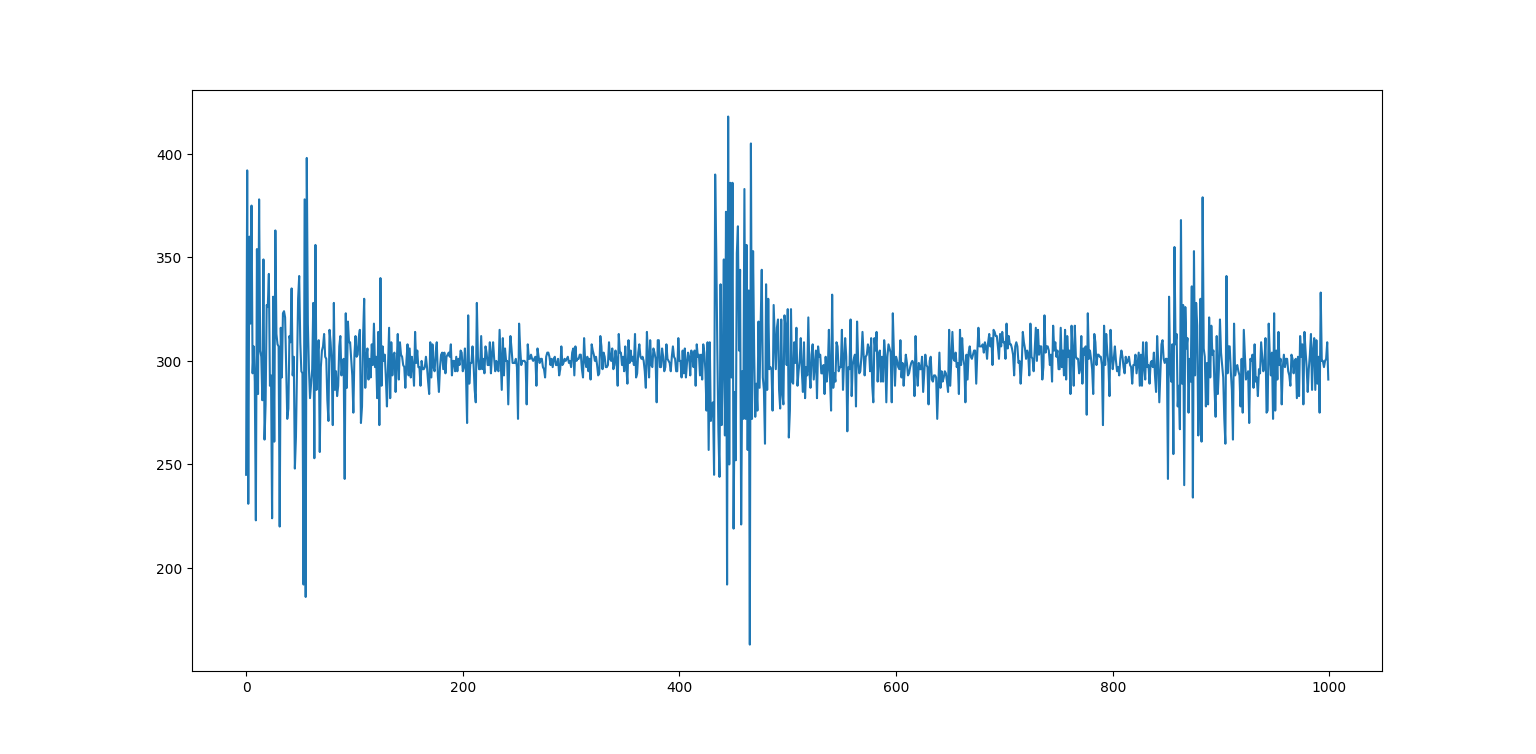

Sujeto 9. 

![alt text](EMG-SAÑUDO.png)

Sujeto 10. Hombre. 

![alt text](EMG-JOSE.png)

### A continuación se realizarán los numerales 4 y 5. 

4. Corrección seguimiento 1 y análisis exploratorio
Aplicar los métodos de análisis del seguimiento 1 y presentar el Análisis Exploratorio de los datos obtenidos en el punto 3 (20%)

5. Presentación de informe , discusión y conclusiones
Realizar un informe que incluya el desarrollo de todos los puntos desarrollados con su respectivo análisis. Discutir los resultados a la luz de lo obtenido en el proyecto 1 (20%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#Cargar archivos
#Frecuencia de muestreo: 66.67 Hz 
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/muestras_emg')
sujetos=[] 
for i in archivo: 
    x1=np.loadtxt(ruta+'/muestras_emg'+'/'+i,delimiter='\t')
    sujetos.append(x1)

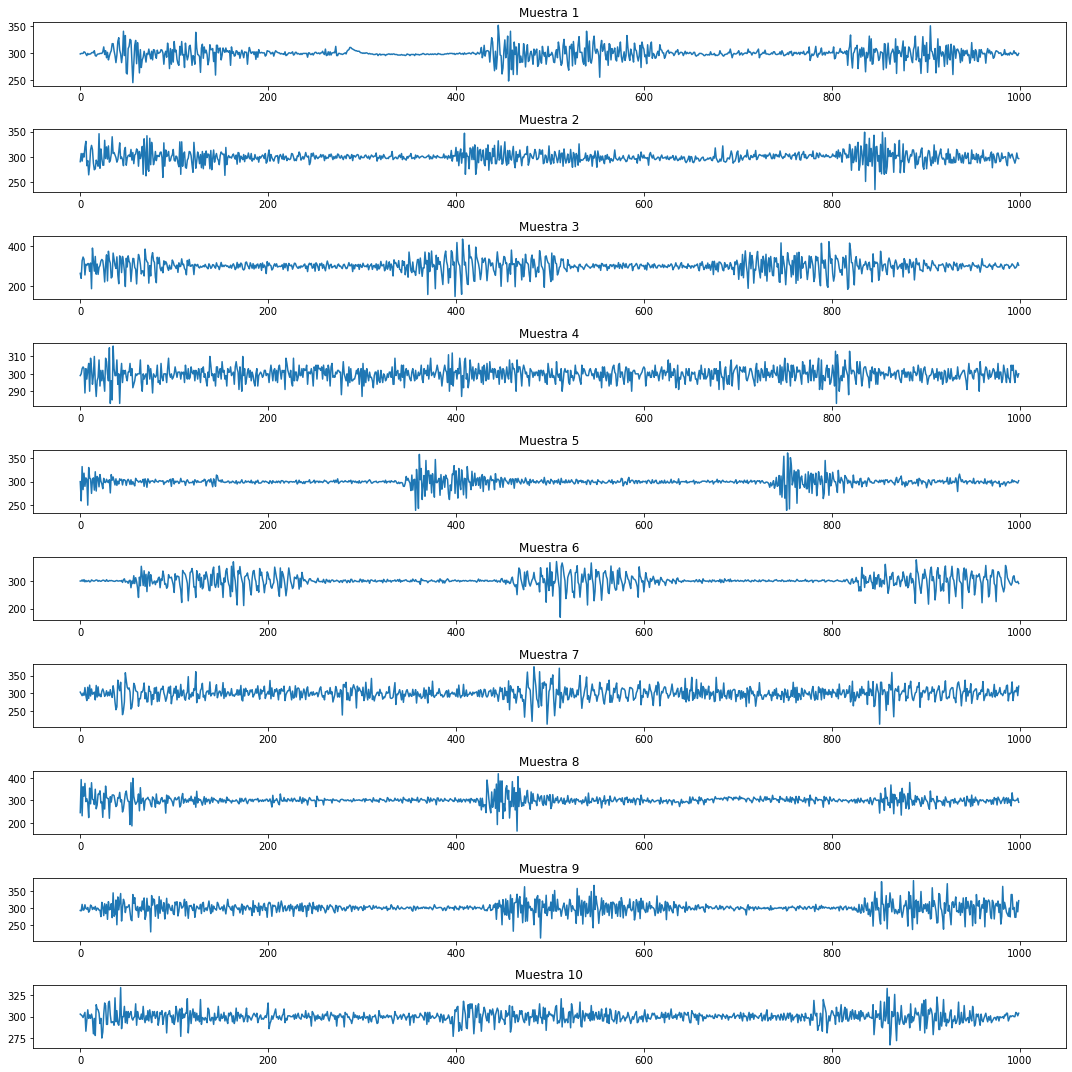

In [60]:
#aquí graficar muestras
plt.figure(figsize=(15,15))
for i in range(len(sujetos)):
    plt.subplot(len(sujetos),1,i+1)
    plt.plot(sujetos[i])
    plt.title(f'Muestra {i+1}')
plt.tight_layout()

Con la visualización de la forma de las señales tomadas pueden apreciarse algunas consideraciones:
- Los momentos con voltaje elevado corresponde a la contracción del músculo tal como fue expuesto en el protocolo de una manera aproximada. Esto puede decirse por los instantes de tiempo donde estos picos de voltaje ocurren.
- Las contracciones musculares, alrededor de todas las muestras, ocurren en momentos de tiempo diferentes pero cercanos. Esto se debe a la diferente capacidad de reacción de los sujetos de prueba para seguir el protocolo. No obstante son suficientemente aproximados con un par de excepciones.
- Algunas de las muestras parecen presentar altos niveles de ruido, lo que puede sugerir el uso de algún filtro u operador para reducirlo. En nuestro caso, esto nos indica que es apropiado hacer uso del operador TKEO, que en prácticas pasadas ha demostrado ser útil para este tipo de tratamientos de señales EMG.

In [61]:
#operador tkeo
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

In [62]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [63]:
def caracteristicas(data): 
    caracs={'xrms':'','xvar':'','xmav':'','xmavs':'','xssc':'','xwl':'','xzc':''}
    xrms=rms(data) #root mean square
    caracs['xrms']=xrms
    xvar=np.var(data) #varianza
    caracs['xvar']=xvar
    xmav=np.mean(np.abs(data)) #mean absolute value
    caracs['xmav']=xmav
    xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
    caracs['xmavs']=xmavs
    derivative = np.diff(data)
    xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
    caracs['xssc']=xssc
    diff_abs = np.abs(np.diff(data))
    xwl = np.sum(diff_abs) #waveform length
    caracs['xwl']=xwl
    xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
    caracs['xzc']=xzc
    return caracs, [xrms,xvar,xmav,xmavs,xssc,xwl,xzc]

**Análisis exploratorio**

Para la realización del análisis exploratorio de las muestras tomadas, se propone realizar una caracterización de los datos por medio del cálculo de las características trabajadas en partes anteriores para la señal con y sin el operador TKEO con el fin de determinar si puede existir una diferencia significativa entre los movimientos en ambos casos.

-Caracterización de señales sin tkeo:

In [64]:
#Esta casilla es para separar los tipos de mov flexión y extensión según los tiempos.
movs=[] #donde guardar todos los movimientos separados
tset=134 #cada dos segundos hay cambio de movimiento. 2 segundos -> 134 datos aprox.
for i in sujetos:
    for k in range(1,7): #3 flexiones, 3 extensiones. 2 primeros segundos se descartan
        mov=i[(tset*k):(tset*(k+1))]
        movs.append(mov) 
#como movimientos van intercalados, posiciones pares corresponden a un mov y las impares al otro
flexion=movs[::2]
extension=movs[1::2]

Teniendo en cuenta que el proyecto está orientado a la discriminación de movimientos por medio de análisis de señales EMG y dado que el protocolo realizado lo permite, es pertinente realizar una segmentación de la señal para dividir las partes correspondientes a flexión y extensión en las muestras tomadas. Dado que el cambio de movimiento se realizaba cada dos segundos y las muestras fueron tomadas a una frecuencia de muestreo de 67 Hz, se sabe que cada 134 datos representan un segmento que incluye la información de cada movimiento. Lo anterior para 3 veces cada movimiento por muestra.

In [65]:
#calculo de caracteristicas de muestras 
caracs_flexion=[] #todas las características de todas las muestras
for sujeto in flexion:
    car_flex,car=caracteristicas(sujeto) 
    for i in car:
        caracs_flexion.append(i)

caracs_extension=[] #todas las características de todas las muestras
for sujeto in extension:
    car_ext,car=caracteristicas(sujeto) 
    for i in car:
        caracs_extension.append(i)

Se realiza una caracterización de cada movimiento de flexión y extensión presente en las muestras para luego visualizar por medio de diagramas de cajas y bigotes si existe algún indicio de una diferencia que pueda ser siginificativa.

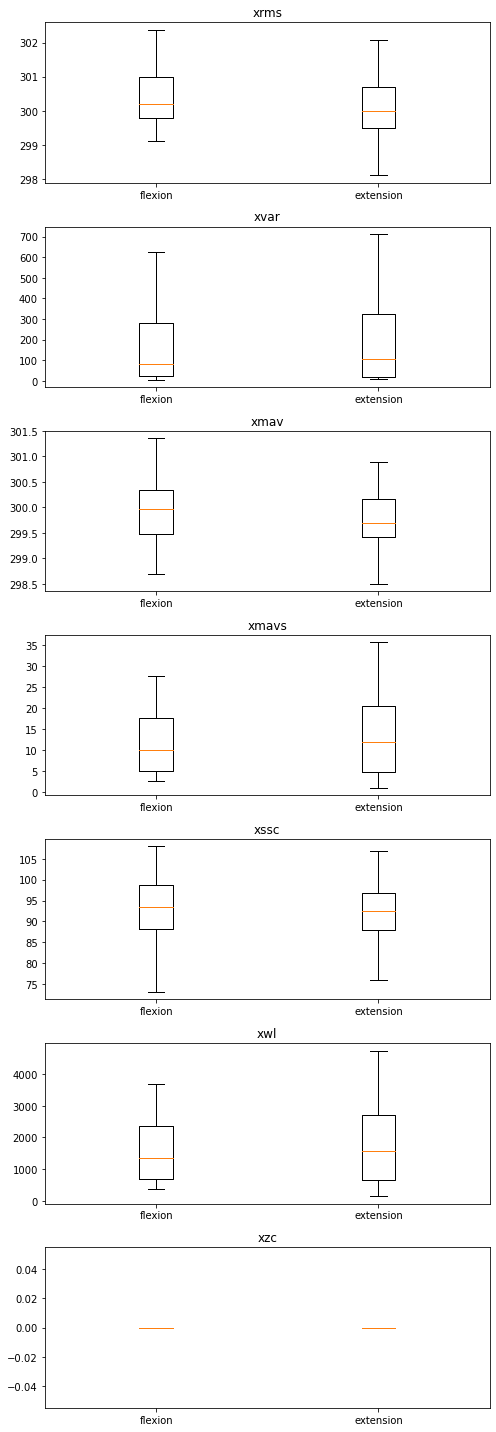

In [66]:
#Graficas
flex=np.array(caracs_flexion)
ext=np.array(caracs_extension)
flex=np.reshape(flex,(len(sujetos)*3,7)) #reshape para plotear más fácil
ext=np.reshape(ext,(len(sujetos)*3,7))
plt.figure(figsize=(7,20))
names=['xrms','xvar','xmav','xmavs','xssc','xwl','xzc']
for i in range(0,7):
    plt.subplot(7,1,i+1)
    plt.boxplot((flex[:,i], ext[:,i]), showfliers=False) 
    plt.xticks([1,2],['flexion','extension'])
    plt.title(names[i])
plt.tight_layout()


Como puede observarse en los diagramas, la visualización de cada característica para los movimientos de flexión y extensión es visualmente similar y por tanto sería adecuado decir que posiblemente no haya una diferencia significativa para ninguna de ellas. Que esto suceda sugiere que se debe realizar este mismo análisis para las muestras con TKEO dado que esta similitud en las características puede deberse al ruido de las señales.

-Caracterización de señales con tkeo

In [67]:
#tkeo de las muestras 
sujetos_tkeo=[]
for i in sujetos:
    x=tkeo(i)
    sujetos_tkeo.append(x)
#segmentación
movs=[] 
tset=134 
for i in sujetos_tkeo:
    for k in range(1,7): #3 flexiones, 3 extensiones. 2 primeros segundos se descartan
        mov=i[(tset*k):(tset*(k+1))]
        movs.append(mov) 
#como movimientos van intercalados, posiciones pares corresponden a un mov y las impares al otro
flexion_tkeo=movs[::2]
extension_tkeo=movs[1::2]

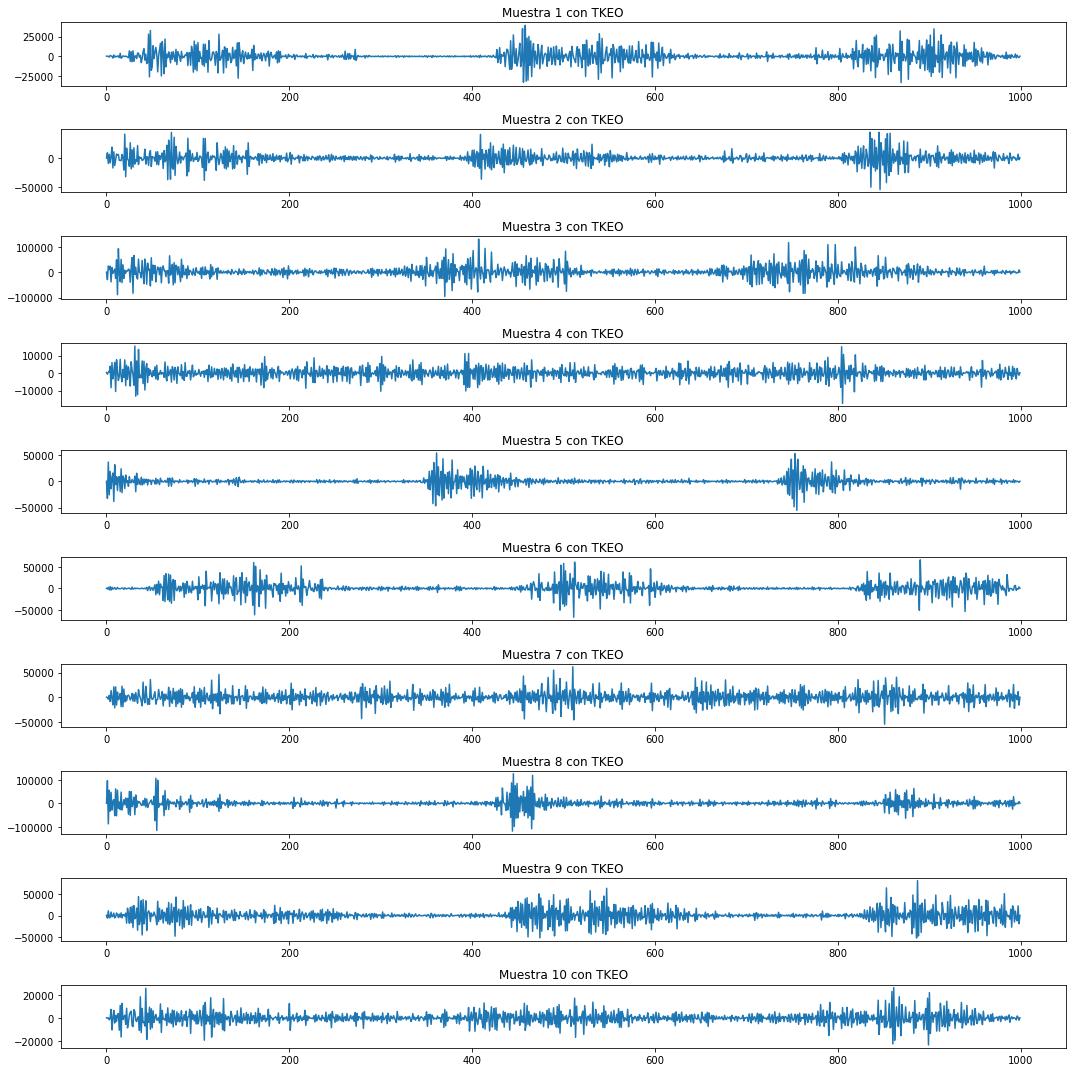

In [68]:
#Gráficas de señal con TKEO
plt.figure(figsize=(15,15))
for i in range(len(sujetos_tkeo)):
    plt.subplot(len(sujetos_tkeo),1,i+1)
    plt.plot(sujetos_tkeo[i])
    plt.title(f'Muestra {i+1} con TKEO')
plt.tight_layout()

Se puede observar que para las señales con TKEO el nivel de ruido es reducido y se mantienen los aspectos temporales mencionados anteriormente en la primera visualización de los datos.

In [69]:
#calculo de caracteristicas de muestras con tkeo
caracs_flexion=[] #todas las características de todas las muestras
for sujeto in flexion_tkeo:
    car_flex,car=caracteristicas(sujeto) 
    for i in car:
        caracs_flexion.append(i)

caracs_extension=[] #todas las características de todas las muestras
for sujeto in extension_tkeo:
    car_ext,car=caracteristicas(sujeto) 
    for i in car:
        caracs_extension.append(i)


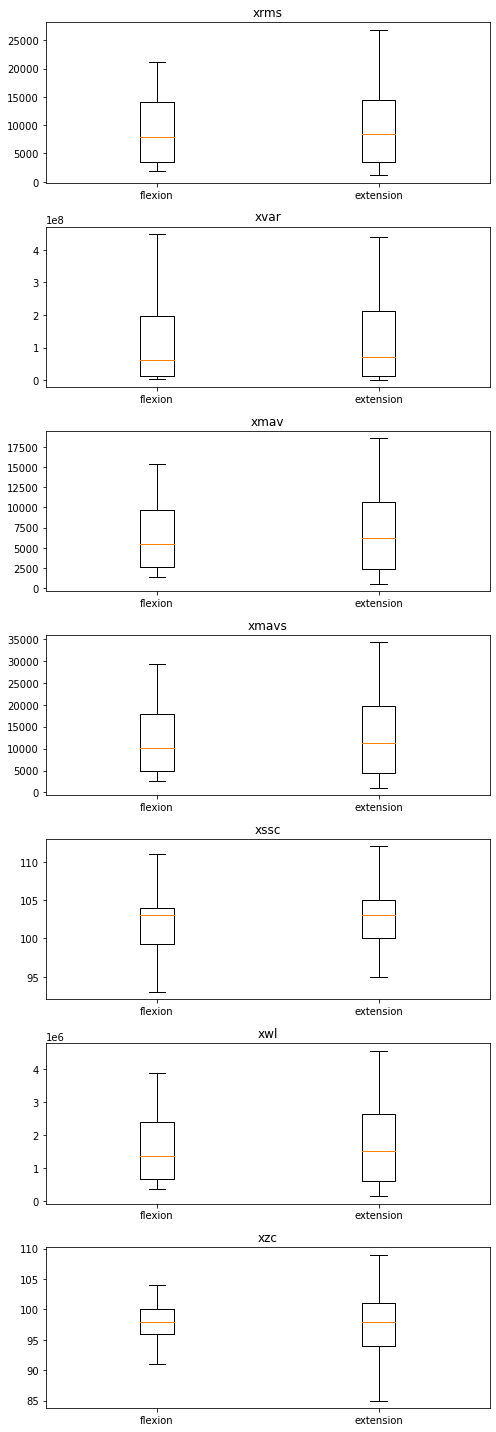

In [70]:
#boxplots con tkeo
flex=np.array(caracs_flexion)
ext=np.array(caracs_extension)
flex=np.reshape(flex,(len(sujetos_tkeo)*3,7)) #reshape para plotear más fácil
ext=np.reshape(ext,(len(sujetos_tkeo)*3,7))
plt.figure(figsize=(7,20))
names=['xrms','xvar','xmav','xmavs','xssc','xwl','xzc']
for i in range(0,7):
    plt.subplot(7,1,i+1)
    plt.boxplot((flex[:,i], ext[:,i]), showfliers=False) 
    plt.xticks([1,2],['flexion','extension'])
    plt.title(names[i])
plt.tight_layout()

Se puede apreciar que para la señal con TKEO, las características de Zero Crossings (zc) y Slope Sign Changes (ssc) son visiblemente diferentes, lo que es una indicación de que éstos dos parámetros podrían ser claves para la diferenciación de ambos movimientos. A partir de éstos entonces es que se realiza las pruebas de hipótesis.

**Pruebas de hipótesis**

In [74]:
from scipy import stats
alpha=0.05 #valor de significancia

Para un análisis inicial, en vista de que se está partiendo de una posible diferencia entre valores de las características de las muestras, basta con realizar pruebas de hipótesis que brinden información acerca de la similitud entre dos conjuntos de datos. Para este caso decidimos realizar prueba de Mann-Whitney para comparar medianas (o bien, distribución) dado que por la forma de las señales se indica que ningún movimiento de flexión y extensión tienen un comportamiento normal y se deben hacer pruebas no paramétricas; y prueba de Fisher para determinar si hay una diferencia entre las varianzas de ambos grupos.

Zero Crossings

In [80]:
#Prueba Mann Whitney para diferencia estadística
statistic, p_value = stats.mannwhitneyu(flex[:,6], ext[:,6])
if p_value < alpha:
    print('No existe diferencia significativa entre ZC de flexión y extensión')
else:
    print('Existe diferencia significativa entre ZC de flexión y extensión')

Existe diferencia significativa entre ZC de flexión y extensión


Para verificar si existe diferencia estadística entre las distribuciones de los valores de Zero Crossings para movimientos de flexión y extensión, se realiza una prueba de Mann-Whitney (no paramétrica). La hipotésis nula de esta prueba es que no existe diferencia estadística entre las distribuciones de dos grupos de datos, por lo tanto, dado que el valor p calculado fue menor que el valor de significancia definido, esta prueba nos indica que para los datos de flexión y extensión, sus valores de ZC correspondientes son estadísticamente diferentes.

In [77]:
#Prueba de Fisher para comparar varianzas
f_statistic, p_value = stats.f_oneway(flex[:,6], ext[:,6])
if p_value < alpha:
    print('Las varianzas son estadísticamente diferentes')
else:
    print('No hay diferencia estadística significativa entre las varianzas')

No hay diferencia estadística significativa entre las varianzas


La hipótesis nula de la prueba de Fisher es que no existe una diferencia significativa entre las varianzas. Se podría pensar que para que ambas muestras sean diferentes, el valor de varianza entre ellas también debe serlo. Sin embargo lo contrario no es necesariamente verdadero dado que las dispersiones pueden ser similares en distribuciones de datos diferentes. Por tanto, esta prueba nos podría estar dando una indicación más relacionada a la naturaleza del movimiento como señal tomada por EMG. 

Slope Sign Changes

In [81]:
#Prueba Mann Whitney para diferencia estadística
statistic, p_value = stats.mannwhitneyu(flex[:,4], ext[:,4])
if p_value < alpha:
    print('No existe diferencia significativa entre SSC de flexión y extensión')
else:
    print('Existe diferencia significativa entre SSC de flexión y extensión')

Existe diferencia significativa entre SSC de flexión y extensión


In [82]:
#Prueba de Fisher para comparar varianzas
f_statistic, p_value = stats.f_oneway(flex[:,4], ext[:,4])
if p_value < alpha:
    print('Las varianzas son estadísticamente diferentes')
else:
    print('No hay diferencia estadística significativa entre las varianzas')

No hay diferencia estadística significativa entre las varianzas


A partir de las pruebas realizadas se puede concluir que los parámetros *ssc* y *zc* podrían ser claves para la diferenciación de los movimientos de flexión y extensión para las muestras tomadas después de aplicarles el operador TKEO. 
De igual manera, se podrían considerar diferentes ajustes al análisis y toma de muestras para solucionar los problemas relacionados el ruido y desajuste temporal de los movimientos para así realizar una evaluación más apropiada de los datos que pueda involucrar la valoración de otros parámetros de las señales.